# Estimación de Z a partir de los índices de color...

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [2]:
# load the data
data = np.load('sdss_galaxy_colors.npy')

In [3]:
print(data)

[(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05)
 (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05)
 (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05)
 ...
 (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05)
 (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04)
 (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)]


In [4]:
df = pd.DataFrame(data)

In [5]:
df

,u,g,r,i,z,spec_class,redshift,redshift_err
0,19.84132,19.52656,19.46946,19.17955,19.10763,b'QSO',0.539301,0.000065
1,19.86318,18.66298,17.84272,17.38978,17.14313,b'GALAXY',0.164570,0.000012
2,19.97362,18.31421,17.47922,17.07440,16.76174,b'GALAXY',0.041900,0.000022
3,19.05989,17.49459,16.59285,16.09412,15.70741,b'GALAXY',0.044277,0.000011
4,19.45567,18.33084,17.67185,17.30189,17.13650,b'GALAXY',0.041644,0.000018
...,...,...,...,...,...,...,...,...
49995,18.78195,17.36771,16.62808,16.24659,15.97817,b'GALAXY',0.078153,0.000031
49996,19.65251,17.59881,16.63644,16.19178,15.85334,b'GALAXY',0.079438,0.000020
49997,19.82667,18.10038,17.16133,16.57960,16.19755,b'GALAXY',0.078459,0.000022
49998,19.98672,19.75385,19.57130,19.27739,19.25895,b'QSO',1.567295,0.000451


In [6]:
def get_features_targets(data):
  # complete this function
  features = np.zeros(shape=(len(df), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

In [7]:
# call our function 
features, targets = get_features_targets(data)

In [8]:
features

array([[3.14760e-01, 5.71000e-02, 2.89910e-01, 7.19200e-02],
       [1.20020e+00, 8.20260e-01, 4.52940e-01, 2.46650e-01],
       [1.65941e+00, 8.34990e-01, 4.04820e-01, 3.12660e-01],
       ...,
       [1.72629e+00, 9.39050e-01, 5.81730e-01, 3.82050e-01],
       [2.32870e-01, 1.82550e-01, 2.93910e-01, 1.84400e-02],
       [1.90670e-01, 3.65500e-02, 4.63900e-02, 2.30000e-04]])

In [9]:
targets

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

In [10]:
def validate_model(model, features, targets):
  # split the data into training and testing
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # train the model
  model.fit(train_features, train_targets)

  # get the predicted_redshifts
  predictions = model.predict(test_features)  
  
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)


In [11]:
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# Mean ERROR: 

## SVM

In [12]:
from sklearn import svm

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = svm.SVR(kernel='rbf', gamma='scale')

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.029124


In [13]:
svm = diff

## DecisionTreeRegressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = DecisionTreeRegressor()

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.021542


In [15]:
dt = diff

## RandomForestRegressor 20

In [16]:
from sklearn.ensemble import RandomForestRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = RandomForestRegressor(n_estimators=20)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.017563


In [17]:
rf20 = diff

## RandomForestRegressor 10

In [18]:
from sklearn.ensemble import RandomForestRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = RandomForestRegressor(n_estimators=10)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.017976


In [19]:
rf10 = diff

## GradientBoostingRegressor 10 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = GradientBoostingRegressor(n_estimators=10)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.089472


In [21]:
ada10 = diff

## GradientBoostingRegressor 20 

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = GradientBoostingRegressor(n_estimators=20)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.046997


In [23]:
ada20 = diff

## GradientBoostingRegressor 30 

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = GradientBoostingRegressor(n_estimators=30)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.037261


In [26]:
ada30 = diff

## GradientBoostingRegressor 40 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = GradientBoostingRegressor(n_estimators=40)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.035327


In [28]:
ada40 = diff

## GradientBoostingRegressor 50 

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = GradientBoostingRegressor(n_estimators=50)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.035024


In [30]:
ada50 = diff

## GradientBoostingRegressor 70 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# initialize model
dtr = GradientBoostingRegressor(n_estimators=70)

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.032997


In [32]:
ada70 = diff

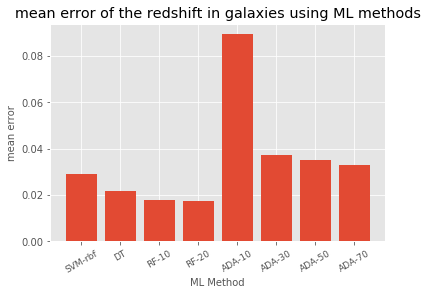

In [33]:
label = ['SVM-rbf', 'DT', 'RF-10', 'RF-20', 'ADA-10', 'ADA-30', 'ADA-50', 'ADA-70']
result = [svm,dt,rf10,rf20,ada10,ada30,ada50,ada70]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, result)
    plt.xlabel('ML Method', fontsize=10)
    plt.ylabel('mean error', fontsize=10)
    plt.xticks(index, label, fontsize=9, rotation=30)
    #plt.ylim([65, 80])
    plt.title('mean error of the redshift in galaxies using ML methods')
    plt.show()
    
plot_bar_x()

In [35]:
def makeTable(headerRow,columnizedData,columnSpacing=2):
    """Creates a technical paper style, left justified table

    Author: Christopher Collett
    Date: 6/1/2019"""
    from numpy import array,max,vectorize

    cols = array(columnizedData,dtype=str)
    colSizes = [max(vectorize(len)(col)) for col in cols]

    header = ''
    rows = ['' for i in cols[0]]

    for i in range(0,len(headerRow)):
        if len(headerRow[i]) > colSizes[i]: colSizes[i]=len(headerRow[i])
        headerRow[i]+=' '*(colSizes[i]-len(headerRow[i]))
        header+=headerRow[i]
        if not i == len(headerRow)-1: header+=' '*columnSpacing

        for j in range(0,len(cols[i])):
            if len(cols[i][j]) < colSizes[i]:
                cols[i][j]+=' '*(colSizes[i]-len(cols[i][j])+columnSpacing)
            rows[j]+=cols[i][j]
            if not i == len(headerRow)-1: rows[j]+=' '*columnSpacing

    line = '-'*len(header)
    print(line)
    print(header)
    print(line)
    for row in rows: print(row)
    print(line)

In [36]:
header = ['ML Method','Mean Error']
label = [ 'SVM-rbf', 'DT', 'RF-10', 'RF-20', 'ADA-10', 'ADA-30', 'ADA-50', 'ADA-70']
result = ['%.4f'%svm,'%.4f'%dt,'%.4f'%rf10,'%.4f'%rf20,'%.4f'%ada10,'%.4f'%ada30,'%.4f'%ada50,'%.4f'%ada70]

makeTable(header,[label,result])

---------------------
ML Method  Mean Error
---------------------
SVM-rbf  0.0291 
DT       0.0215 
RF-10    0.0180 
RF-20    0.0176 
ADA-10   0.0895 
ADA-30   0.0373 
ADA-50   0.0350 
ADA-70   0.0330 
---------------------


Algunas gráficas...

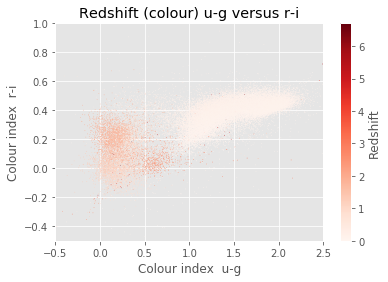

In [37]:
# Complete the following to make the plot
data = np.load('sdss_galaxy_colors.npy')
# Get a colour map
cmap = plt.get_cmap('Reds')

# Define our colour indexes u-g and r-i
u_g = data['u'] - data['g']
r_i = data['r'] - data['i']

# Make a redshift array
redshift = data['redshift']

# Create the plot with plt.scatter
plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

cb = plt.colorbar(plot)
cb.set_label('Redshift')

# Define your axis labels and plot title
plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')

# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)

plt.show()